## <span style="color:red"> Version antérieure à la mise à jour du 29 Mars 2023 </span>

<div style=" background-color: RGB(10,100,100);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réaliser une étude de santé publique avec R ou Python
</h2>
</div>

<div style=" background-color: RGB(10,100,100);" >

<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Enjeux : Réalisez une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.</h1>
<h2 style="margin: auto; padding: 20px; color:#fff;"> Importation des librairies, chargement des fichiers CSV et nettoyages des donnée </a>
<h2 style="margin: auto; padding: 20px; color:#fff;">Plan d'étude :</a>   
<h3 style="margin: auto; padding: 20px; color:#fff;">I. Demandes formulées par Marc pour l'année 2017</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.1. Proportion de personnes en état de sous-nutrition </a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.2.Nombre théorique de personnes pouvant être nourris. Le calculer à partir de la disponibilité alimentaire mondiale</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.3. Calculer la disponibilité alimentaire des produits végétaux</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.4.Déterminer l'utilisation de la disponibilité intérieur </a>  
<h3 style="margin: auto; padding: 20px; color:#fff;">II. Demandes formulées par Mélanie pour chacun des pays</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">II.1. Pays où la proportion de personnes sous alimentées est la plus forte en 2017 </a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">II.2. Pays qui ont bénéficié le plus d'aide en 2013 </a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">II.3. Pays ayant le plus/le moins de disponibilité par habitants </a>  
<h3 style="margin: auto; padding: 20px; color:#fff;">III. Obervations et remarques de Julien</a>  
<h3 style="margin: auto; padding: 20px; color:#fff;">Utilisation étonnante de certaines denrées alimentaire: l'exemple des céréales et du manioc</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">III.1. Etude sur l'utilisation des céréales</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">III.2. Etude sur l'utilisation du manioc en Thailande</a>  

</div>

<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données</a> 
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> 1.1 - Importation des librairies </a></h3>
</div>

In [1]:
#Importation des librairies numpy et panda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div style="border: 5px solid RGB(0,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,100,100); "> 1.2 - Importation des fichiers CSV et inspection des données </a></h3>
</div>

### Importation du fichier "aide_alimentaire" et inspection de ses données

In [2]:
#Importation fichier csv "aide_alimentaire"
aide_alimentaire=pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [3]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe "aide_alimentaire"
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [4]:
#Renommer la colonne "Valeur" en "Qtité Aide en tonne"
aide_alimentaire=aide_alimentaire.rename(columns={'Valeur':'Qtité Aide en tonne'})

In [5]:
# Description statistiques de la la quantité d'aide alimentaire disribuées dans le monde
aide_alimentaire.describe()

,Année,Qtité Aide en tonne
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


### Importation du fichier "population" et inspection de ses données

In [6]:
#Importation fichier csv "population"
population=pd.read_csv('population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [7]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe "population"
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [8]:
#Dans le dataframe "population", la population est exprimée en millier d'habitants => Convertir les milliers en million
population['Valeur'] = population['Valeur']*1000
population

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [9]:
#Renommer colonne 'Valeur' en colonne 'Population'
population=population.rename(columns={'Valeur':'Population'})
population

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [10]:
#Aperçu statistique de la population mondiale
population.describe()

,Année,Population
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+07
std,1.708428,1.300812e+08
min,2013.000000,7.930000e+02
25%,2014.000000,3.783410e+05
50%,2015.500000,5.126480e+06
75%,2017.000000,1.930666e+07
max,2018.000000,1.427648e+09


### Importation du fichier "sous_nutrition" et inspection de ses données

In [11]:
#Importation fichier csv "sous_nutrition"
sous_nutrition=pd.read_csv('sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [12]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe "sous_nutrition" 
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [13]:
#Nombre de valeurs manquantes
sous_nutrition["Valeur"].isnull().sum()

594

In [14]:
#Remplacer les valeurs string'<0.1' en '0.05' puis le convertir en type float. Mais les valeurs seront affectés par la suite 
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<0.1', '0.05').astype(float)

In [15]:
#Pour éviter de fausser le nombre de personnes sous-nutris dans le monde et et par pays, les valeurs manquantes "Nan" seront remplacés par 0 au lieu d'être imputer par la médiane.
sous_nutrition["Valeur"] = sous_nutrition['Valeur'].fillna(0)

**Les variables de la colonne "Année" du dataframe "sous_nutrition" sont de type "object" parce qu'elles représentent une intervalle de date. Pour faciliter la fusion avec les deux autres dataframe "population" et "aide_alimentaire" par la suite, ils doivent tous les trois être dans le même type.
Ce changement de type ce déroulera en 4 étapes:**

In [16]:
#Etape 1:Couper le mot composé (intervalle de date) de la colonne 'Année' et mettre les deux parties dans des colonnes différentes en utilisant la méthode 'str.split()'
sous_nutrition[['Début Année', 'Fin Année']] = sous_nutrition['Année'].str.split('-', 1, expand=True)
sous_nutrition


,Zone,Année,Valeur,Début Année,Fin Année
0,Afghanistan,2012-2014,8.6,2012,2014
1,Afghanistan,2013-2015,8.8,2013,2015
2,Afghanistan,2014-2016,8.9,2014,2016
3,Afghanistan,2015-2017,9.7,2015,2017
4,Afghanistan,2016-2018,10.5,2016,2018
...,...,...,...,...,...
1213,Zimbabwe,2013-2015,0.0,2013,2015
1214,Zimbabwe,2014-2016,0.0,2014,2016
1215,Zimbabwe,2015-2017,0.0,2015,2017
1216,Zimbabwe,2016-2018,0.0,2016,2018


In [17]:
#Etape 2:Convertir les nouvelles données 'Début Année' et 'Fin Année' en type integer
sous_nutrition[['Début Année', 'Fin Année']]=sous_nutrition[['Début Année', 'Fin Année']].astype(int)
sous_nutrition

,Zone,Année,Valeur,Début Année,Fin Année
0,Afghanistan,2012-2014,8.6,2012,2014
1,Afghanistan,2013-2015,8.8,2013,2015
2,Afghanistan,2014-2016,8.9,2014,2016
3,Afghanistan,2015-2017,9.7,2015,2017
4,Afghanistan,2016-2018,10.5,2016,2018
...,...,...,...,...,...
1213,Zimbabwe,2013-2015,0.0,2013,2015
1214,Zimbabwe,2014-2016,0.0,2014,2016
1215,Zimbabwe,2015-2017,0.0,2015,2017
1216,Zimbabwe,2016-2018,0.0,2016,2018


In [18]:
#Ex: pour l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013

#Etape 3: Chercher les moyennes des deux dates: 'Début Année' et 'Fin Année' et les mettre dans la colonne 'Année moy' nouvellement crée
sous_nutrition ['Année moy']=round((sous_nutrition ['Début Année']+sous_nutrition['Fin Année'])/2)
sous_nutrition

,Zone,Année,Valeur,Début Année,Fin Année,Année moy
0,Afghanistan,2012-2014,8.6,2012,2014,2013.0
1,Afghanistan,2013-2015,8.8,2013,2015,2014.0
2,Afghanistan,2014-2016,8.9,2014,2016,2015.0
3,Afghanistan,2015-2017,9.7,2015,2017,2016.0
4,Afghanistan,2016-2018,10.5,2016,2018,2017.0
...,...,...,...,...,...,...
1213,Zimbabwe,2013-2015,0.0,2013,2015,2014.0
1214,Zimbabwe,2014-2016,0.0,2014,2016,2015.0
1215,Zimbabwe,2015-2017,0.0,2015,2017,2016.0
1216,Zimbabwe,2016-2018,0.0,2016,2018,2017.0


In [19]:
#Etape 4: Suppression des colonnes devenues superflues
sous_nutrition=sous_nutrition.drop(columns=['Année','Début Année','Fin Année'])
sous_nutrition

,Zone,Valeur,Année moy
0,Afghanistan,8.6,2013.0
1,Afghanistan,8.8,2014.0
2,Afghanistan,8.9,2015.0
3,Afghanistan,9.7,2016.0
4,Afghanistan,10.5,2017.0
...,...,...,...
1213,Zimbabwe,0.0,2014.0
1214,Zimbabwe,0.0,2015.0
1215,Zimbabwe,0.0,2016.0
1216,Zimbabwe,0.0,2017.0


In [20]:
#Renommer la nouvelle colonne 'Année moy' en 'Année' et 'Valeur' en 'Population sous nutris'
sous_nutrition=sous_nutrition.rename(columns={'Année moy':'Année','Valeur':'Population sous nutris'})
sous_nutrition

,Zone,Population sous nutris,Année
0,Afghanistan,8.6,2013.0
1,Afghanistan,8.8,2014.0
2,Afghanistan,8.9,2015.0
3,Afghanistan,9.7,2016.0
4,Afghanistan,10.5,2017.0
...,...,...,...
1213,Zimbabwe,0.0,2014.0
1214,Zimbabwe,0.0,2015.0
1215,Zimbabwe,0.0,2016.0
1216,Zimbabwe,0.0,2017.0


In [21]:
#Multiplier par 1000000 pour un résultat cohérent par la suite
sous_nutrition['Population sous nutris']=sous_nutrition['Population sous nutris']*1000000

In [22]:
#Description statistique du nombre de personnes sous-nutris dans le monde de l'année 2013 à 2018
sous_nutrition.describe()

,Population sous nutris,Année
count,1.218000e+03,1218.000000
mean,2.619704e+06,2015.500000
std,1.414791e+07,1.708527
min,0.000000e+00,2013.000000
25%,0.000000e+00,2014.000000
50%,5.000000e+04,2015.500000
75%,1.200000e+06,2017.000000
max,2.038000e+08,2018.000000


**<span style="color:blue"> On observe déjà qu'il y a une grande disparité dans le monde entre les pays qui ont un faible nombre de personnes sous-nutris et ceux dont le nombre est beaucoup plus élevé. </span>**

## Importation du fichier "dispo_alimentaire" et inspection de ses données

In [23]:
#Importation fichier csv "dispo_alimentaire"
dispo_alimentaire=pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head(6)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN


In [24]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe 'dispo_alimentaire'
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [25]:
#Déterminer le nombre de valeurs manquantes par colonnes
dispo_alimentaire.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [26]:
# Remplacement des valeurs manquantes par 0 pour ne pas fausser les résultats (augmenter de manière brusque la disponibilité alimentaire de certains pays ou le baisser)
dispo_alimentaire=dispo_alimentaire.fillna(0)
dispo_alimentaire.head(6)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0


In [27]:
# Aperçu statistique de la disponiblité alimentaire
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,83.578661,55.432426,31.748927,7.830948,0.969754,0.906513,631.143480,86.649023,83.053701,312.480487,29.073887,641.440564,9.912272,141.280807,-6.690292
std,1779.289153,3013.629812,102.961194,23.478909,3.246695,3.143516,9002.563666,933.435208,700.099451,4242.854724,584.672236,9270.864198,194.897843,3992.567621,362.380787
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.520000,0.020000,0.020000,6.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,18.000000,4.270000,0.310000,0.350000,73.000000,4.000000,16.000000,40.000000,0.000000,42.000000,0.000000,0.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 2 - Analyse exploratoire des fichiers​ </a> 
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I. Demandes formulées par Marc pour l'année 2017 </a></h3>
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I.1. Proportion de personnes en état de sous-nutrition </a></h3>
</div>

In [28]:
#Présélectionner la date 2017 dans les 2 dataframes "sous_nutrition" et "population" pour faciliter le codage par la fusion de ce dataframe avec un autre  
Sous_nutrition2017=sous_nutrition.loc[sous_nutrition['Année']==2017]
Population2017=population.loc[population['Année']==2017]

In [29]:
#Vérifier le nombre de lignes du dataframe "Sous_nutrition2017" avant la fusion
Sous_nutrition2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 4 to 1216
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zone                    203 non-null    object 
 1   Population sous nutris  203 non-null    float64
 2   Année                   203 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.3+ KB


In [30]:
#Vérifier le nombre de lignes du dataframe "Population2017" avant la fusion
Population2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   Année       236 non-null    int64  
 2   Population  236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [31]:
#Fusionner les dataframe "sous_nutrition" et "Population2017" pour créer le dataframe "proportion_pers_sous_nutris"

#Une fusion "inner" permettra de se focaliser sur les pays dont on a les données sur le nombre de personnes sous nutris 
proportion_pers_sous_nutris=pd.merge(Sous_nutrition2017, Population2017, on=['Zone','Année'], how ='inner')
display(proportion_pers_sous_nutris)

,Zone,Population sous nutris,Année,Population
0,Afghanistan,10500000.0,2017.0,36296113.0
1,Afrique du Sud,3100000.0,2017.0,57009756.0
2,Albanie,100000.0,2017.0,2884169.0
3,Algérie,1300000.0,2017.0,41389189.0
4,Allemagne,0.0,2017.0,82658409.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),8000000.0,2017.0,29402484.0
199,Viet Nam,6500000.0,2017.0,94600648.0
200,Yémen,0.0,2017.0,27834819.0
201,Zambie,0.0,2017.0,16853599.0


In [32]:
proportion_pers_sous_nutris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zone                    203 non-null    object 
 1   Population sous nutris  203 non-null    float64
 2   Année                   203 non-null    float64
 3   Population              203 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [33]:
proportion_pers_sous_nutris.describe()

,Population sous nutris,Année,Population
count,2.030000e+02,203.0,2.030000e+02
mean,2.643842e+06,2017.0,3.716157e+07
std,1.389470e+07,0.0,1.415822e+08
min,0.000000e+00,2017.0,1.300000e+03
25%,0.000000e+00,2017.0,1.439068e+06
50%,5.000000e+04,2017.0,7.698474e+06
75%,1.200000e+06,2017.0,2.550017e+07
max,1.901000e+08,2017.0,1.421022e+09


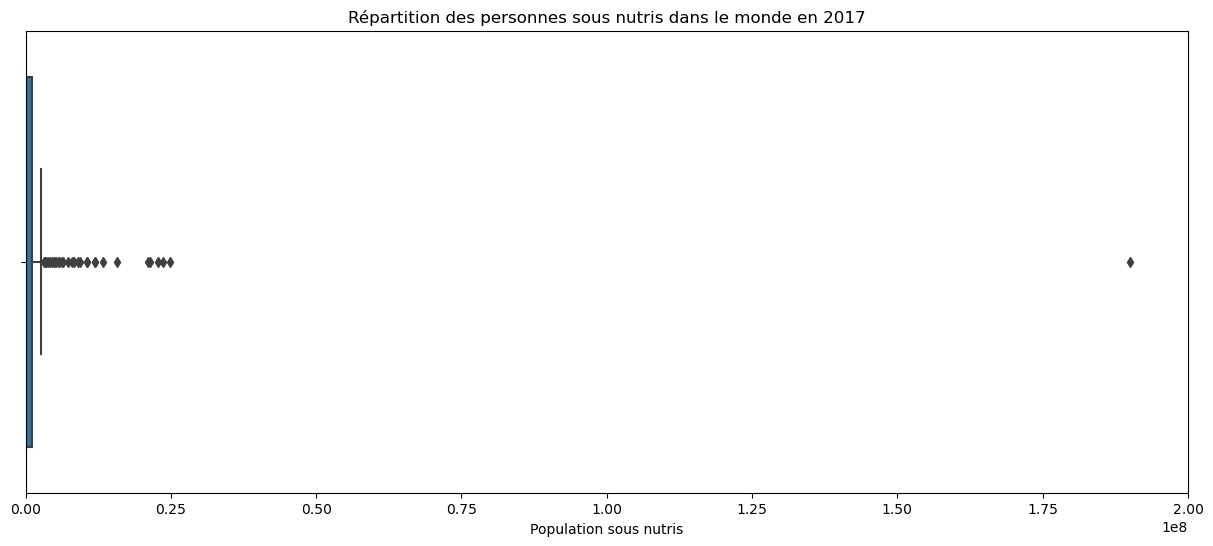

In [34]:
# Boxplot qui représentela répartition des personnes sous nutris dans le monde en 2017
plt.figure(figsize=(15, 6))
plt.title('Répartition des personnes sous nutris dans le monde en 2017') 
sns.boxplot(x=proportion_pers_sous_nutris["Population sous nutris"])
plt.xlim(0, 2e8)
plt.show()

In [35]:
#Population totale (mondiale)
PopTotale=proportion_pers_sous_nutris['Population'].sum()
PopTotale

7543798779.0

In [36]:
#Somme des personnes sous nutris 
PersSousNutris=proportion_pers_sous_nutris['Population sous nutris'].sum()
PersSousNutris

536700000.0

**Proportion de personnes en état de sous nutrition**

In [37]:
#Proportion des personnes en état de sous nutrition en pourcentage
PropPersSousNutris=(PersSousNutris/PopTotale*100)

print("La proportion de personnes sous-nutris est de:","%.2f" % PropPersSousNutris,"%")

La proportion de personnes sous-nutris est de: 7.11 %


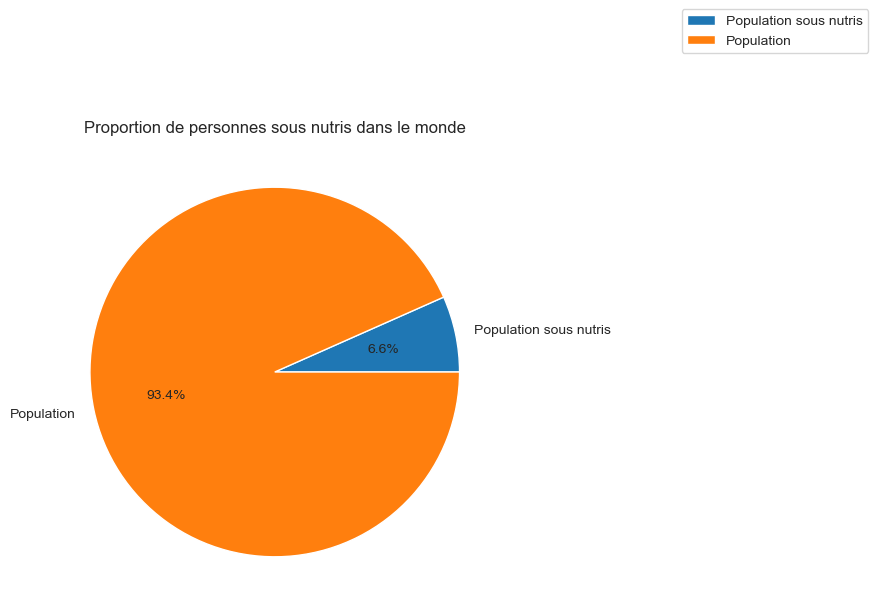

In [38]:
pop=[PersSousNutris,PopTotale]
labels=["Population sous nutris", "Population"]
# Create a pieplot
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(pop, labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.3, 0, 0.5, 1.3))
plt.title('Proportion de personnes sous nutris dans le monde')
plt.show()

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I.2. Nombre théorique de personnes pouvant être nourris. Le calculer à partir de la disponibilité alimentaire mondiale </a></h3>
</div>

In [39]:
#Reprise du dataframe Population2017 de la question1
Population2017=population.loc[population['Année']==2017]
#Création d'un dataframe "dispo_alim1" 
dispo_alim1=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alim1=dispo_alim1.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_alim1.head(3)

Zone
Afghanistan       2087.0
Afrique du Sud    3020.0
Albanie           3188.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [40]:
 #Création du dataframe "dispo_alim2017" issu de la fusion entre le df "Population2017" et "dispo_alim1"
dispo_alim2017=pd.merge(dispo_alim1, Population2017, on='Zone')
dispo_alim2017.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,2087.0,2017,36296113.0
1,Afrique du Sud,3020.0,2017,57009756.0
2,Albanie,3188.0,2017,2884169.0
3,Algérie,3293.0,2017,41389189.0
4,Allemagne,3503.0,2017,82658409.0


In [41]:
#Création de la colonne Disponibilité alimentaire (Kcal/pays/an) qui sera une conversion de la disponibilité en Kcal/pers/jour, pour cela il faut multiplier par 365 (1an pour l'année 2017) et par le nombre de population
dispo_alim2017['Disponibilité alimentaire (Kcal/pays/an)']=dispo_alim2017['Disponibilité alimentaire (Kcal/personne/jour)']*365*dispo_alim2017['Population']


**Déterminer la disponibilité alimentaire totale annuelles par pays**

In [42]:
dispo_alim2017['Disponibilité alimentaire (Kcal/pays/an)'].sum()
print("Il y a une disponibilité alimentaire totale de:", dispo_alim2017['Disponibilité alimentaire (Kcal/pays/an)'].sum(),"Kcal")

Il y a une disponibilité alimentaire totale de: 7635429388975815.0 Kcal


**Déterminer les besoins caloriques annuelles par pays**

In [43]:
#Un homme a besoin entre 2400 à 2600 Kcal par jour, on choisit de prendre 2600Kcal
#Besoin calorique journalier pour un homme => BesoinKcalHJr(Kcal/jr)
BesoinKcalHJr=2600
#Besoin calorique annuel par pays pour un an =>BesoinKcalPaysPAn
#Création d'une nouvelle colonne 'BesoinKcalPaysPAn'
dispo_alim2017['BesoinKcalPaysPAn'] = BesoinKcalHJr*365*dispo_alim2017['Population']


**Pourcentage de personnes pouvant être nourries**

In [44]:
#Pourcentage des personnes pouvant être nourris
#Calcul de la disponibilité alimentaire mondiale pour un an (2017)
dispo_alimmond2017=dispo_alim2017['Disponibilité alimentaire (Kcal/pays/an)'].sum()
#Calcul du besoin calorique mondial
BesoinKcalMond2017=dispo_alim2017['BesoinKcalPaysPAn'].sum()
#Calcul du pourcentage de personnes pouvant être nourris
Pourc_PersPEN=(dispo_alimmond2017/BesoinKcalMond2017)*100

print("Le pourcentage de personnes pouvant être nourries est de:","%.2f" % Pourc_PersPEN,"%")

Le pourcentage de personnes pouvant être nourries est de: 110.34 %


**Nombre théorique de personnes pouvant être nourries**

In [45]:
#Nombre théorique de personnes pouvant être nourries
#Calcul de la population mondiale en 2017
PopulationMond2017=dispo_alim2017['Population'].sum()
#Calcul du nombre théorique de personnes pouvant être nourries
NbretheoPersPEN=(Pourc_PersPEN*PopulationMond2017)/100
print("Nous pouvons nourrir théoriquement environ:", round(NbretheoPersPEN,3),"personnes")

Nous pouvons nourrir théoriquement environ: 8045763318.204 personnes


**<span style="color:blue">La production alimentaire mondiale est suffisante pour couvrir les besoins caloriques de la population globale, mais elle est très mal répartie et gaspillée ce qui limite l'accès équitable à cette nourriture.** 
**<span style="color:blue">Pour maximiser la sécurité alimentaire, des efforts doivent être faits pour optimiser la chaîne d'approvisionnement, réduire le gaspillage et améliorer l'accès pour les populations vulnérables.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); ">  I.3. Calculer la disponibilité alimentaire des produits végétaux </a></h3>
</div>

In [46]:
#Même procédé que la question précédente sauf que l'on va ajouter la colonne "Origine" pour sélectionner les produits d'origine végétales
dispo_alimVeg=dispo_alimentaire[['Zone', 'Origine','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimVeg=dispo_alimVeg.loc[dispo_alimVeg['Origine']=='vegetale']
dispo_alimVeg

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
6,Afghanistan,vegetale,0.0
...,...,...,...
15595,Îles Salomon,vegetale,0.0
15596,Îles Salomon,vegetale,0.0
15597,Îles Salomon,vegetale,0.0
15603,Îles Salomon,vegetale,0.0


In [47]:
# Calculer disponibilité alimentaire totale des aliments végétaux par pays
dispo_alimVeg=dispo_alimVeg.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_alimVeg

Zone
Afghanistan              1871.0
Afrique du Sud           2533.0
Albanie                  2203.0
Algérie                  2915.0
Allemagne                2461.0
                          ...  
Émirats arabes unis      2718.0
Équateur                 1732.0
États-Unis d'Amérique    2698.0
Éthiopie                 2005.0
Îles Salomon             2187.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 174, dtype: float64

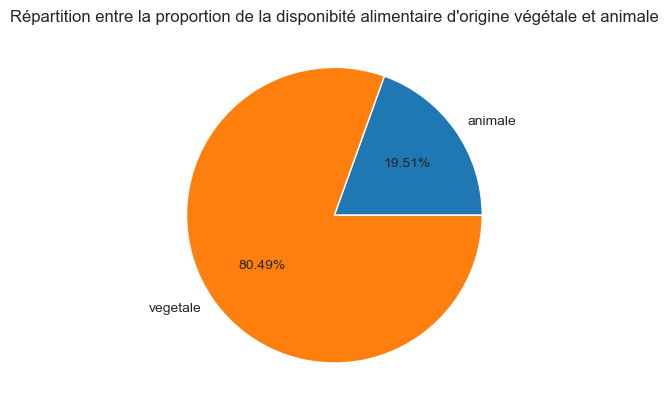

In [48]:
dispo_alimentaire2=dispo_alimentaire[['Zone', 'Origine','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimentaire2=dispo_alimentaire2.groupby('Origine')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_alimentaire2=dispo_alimentaire2.reset_index()
plt.pie(x=dispo_alimentaire2['Disponibilité alimentaire (Kcal/personne/jour)'], labels=dispo_alimentaire2['Origine'], autopct='%.2f%%')
plt.title("Répartition entre la proportion de la disponibité alimentaire d'origine végétale et animale")
plt.show()

In [49]:
 #Création du dataframe "dispo_alim2017" issu de la fusion entre le df "Population2017" et "dispo_alimVeg"
dispo_alim2017Veg=pd.merge(dispo_alimVeg, Population2017, on='Zone')
dispo_alim2017Veg

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,1871.0,2017,36296113.0
1,Afrique du Sud,2533.0,2017,57009756.0
2,Albanie,2203.0,2017,2884169.0
3,Algérie,2915.0,2017,41389189.0
4,Allemagne,2461.0,2017,82658409.0
...,...,...,...,...
167,Émirats arabes unis,2718.0,2017,9487203.0
168,Équateur,1732.0,2017,16785361.0
169,États-Unis d'Amérique,2698.0,2017,325084756.0
170,Éthiopie,2005.0,2017,106399924.0


In [50]:
#Création de la colonne Disponibilité alimentaire (Kcal/pays/an) qui sera une conversion de la disponibilité en Kcal/pers/jour, pour cela il faut multiplier par 365 (1an pour l'année 2017) et par le nombre de population
dispo_alim2017Veg['Disponibilité alimentaire (Kcal/pays/an)']=dispo_alim2017Veg['Disponibilité alimentaire (Kcal/personne/jour)']*365*dispo_alim2017Veg['Population']


**Déterminer la disponibilité alimentaire annuelles de produit végétaux par pays**

In [51]:
#Déterminer la disponibilité alimentaire annuelle de produit végétaux par pays
dispo_alim2017Veg['Disponibilité alimentaire (Kcal/pays/an)'].sum()
print("Il y a une disponibilité alimentaire totale de produit végataux de:", dispo_alim2017Veg['Disponibilité alimentaire (Kcal/pays/an)'].sum(),"Kcal")

Il y a une disponibilité alimentaire totale de produit végataux de: 6300178937197865.0 Kcal


**Déterminer les besoins caloriques annuelles par pays**

In [52]:
#Un homme a besoin entre 2400 à 2600 Kcal par jour, on choisit de prendre 2600Kcal pour plus 
#Besoin calorique journalier pour un homme => BesoinKcalHJr(Kcal/jr)
BesoinKcalHJr=2600
#Besoin calorique annuel par pays pour un an (BesoinKcalPaysPAn) 
#Déterminé par la multiplication du besoin journalier d'un homme, par 365 (1 an) et par le nombre de population
#Création d'une nouvelle colonne 'BesoinKcalPaysPAn'
dispo_alim2017Veg['BesoinKcalPaysPAn'] = BesoinKcalHJr*365*dispo_alim2017Veg['Population']
dispo_alim2017Veg

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Disponibilité alimentaire (Kcal/pays/an),BesoinKcalPaysPAn
0,Afghanistan,1871.0,2017,36296113.0,2.478716e+13,3.444501e+13
1,Afrique du Sud,2533.0,2017,57009756.0,5.270808e+13,5.410226e+13
2,Albanie,2203.0,2017,2884169.0,2.319146e+12,2.737076e+12
3,Algérie,2915.0,2017,41389189.0,4.403706e+13,3.927834e+13
4,Allemagne,2461.0,2017,82658409.0,7.424916e+13,7.844283e+13
...,...,...,...,...,...,...
167,Émirats arabes unis,2718.0,2017,9487203.0,9.411969e+12,9.003356e+12
168,Équateur,1732.0,2017,16785361.0,1.061137e+13,1.592931e+13
169,États-Unis d'Amérique,2698.0,2017,325084756.0,3.201337e+14,3.085054e+14
170,Éthiopie,2005.0,2017,106399924.0,7.786612e+13,1.009735e+14


**Pourcentage de personnes pouvant être nourries de produits végétaux**

In [53]:
#Pourcentage de personnes pouvant être nourris de végétaux
#Calcul de la disponibilité alimentaire mondiale de végétaux pour un an (2017)
dispo_alimmondVeg2017=dispo_alim2017Veg['Disponibilité alimentaire (Kcal/pays/an)'].sum()
#Calcul du besoin calorique mondial
BesoinKcalMond2017=dispo_alim2017Veg['BesoinKcalPaysPAn'].sum()
#Calcul du pourcentage de personnes pouvant être nourris de végétaux
Pourc_PersPENV=(dispo_alimmondVeg2017/BesoinKcalMond2017)*100
print("Le pourcentage de personnes pouvant être nourries de produits végétaux est de:","%.2f" % Pourc_PersPENV,"%")

Le pourcentage de personnes pouvant être nourries de produits végétaux est de: 91.04 %


**Nombre théorique de personnes pouvant être nourries**

In [54]:
#Nombre théorique de personnes pouvant être nourries
#Calcul de la population mondiale en 2017
PopulationMond2017=dispo_alim2017Veg['Population'].sum()
#Calcul du nombre théorique de personnes pouvant être nourries
NbretheoPersPENV=(Pourc_PersPENV*PopulationMond2017)/100
print("Nous pouvons nourrir théoriquement environ:", round(NbretheoPersPENV,3),"personnes")

Nous pouvons nourrir théoriquement environ: 6638755465.962 personnes


**<span style="color:blue">La production alimentaire mondiale en produits végétaaux est suffisante pour couvrir les besoins caloriques de la population globale, mais elle est très mal répartie et gaspillée ce qui limite l'accès équitable à cette nourriture.** 
**<span style="color:blue">Pour maximiser la sécurité alimentaire, des efforts doivent être faits pour optimiser la chaîne d'approvisionnement, réduire le gaspillage et améliorer l'accès pour les populations vulnérables.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I.4. Déterminer l'utilisation de la disponibilité intérieur: </a></h3>
</div>

## **Equation du bilan alimentaire trouvée par Julien**

***Julien a constaté qu'il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur
les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation sous la forme:
A1 + A2 + … = disponibilité intérieure = B1 + B2 + …***  

***Julien a en fait trouvé l'équation du bilan alimentaire:***

*Disponibilité intérieure = Productions + Importations - Exportations + Variation des stocks*   
*Disponibilité intérieure = Semences + Aliments pour animaux + Nourriture + Pertes + Autres utilisations + Traitements*  

**Donc:**    

*Semences + Aliments pour animaux + Nourriture + Pertes + Autres utilisations + Traitements = **Disponibilité intérieure** = Productions + Importations - Exportations + Variation des stocks*

### - La part d'alimentation animale

In [55]:
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Somme de l'alimentation animale
Somme_AlimAnim=dispo_alimentaire['Aliments pour animaux'].sum()
Somme_AlimAnim

1304245.0

In [57]:
#Somme de la disponibilité intérieure
Somme_DispInt=dispo_alimentaire['Disponibilité intérieure'].sum()
Somme_DispInt

9848994.0

In [58]:
#Pourcentage pour l'alimentation animale
Pourc_AlimAnim=(Somme_AlimAnim/Somme_DispInt)*100

print("La part d'alimentation animale représentent:","%.2f" % Pourc_AlimAnim,"%")

La part d'alimentation animale représentent: 13.24 %


### - Les pertes

In [59]:
#Somme des pertes
Somme_Pertes=dispo_alimentaire['Pertes'].sum()
Somme_Pertes

453698.0

In [60]:
#Pourcentage des pertes
Pourc_pertes=(Somme_Pertes/Somme_DispInt)*100

print("Les pertes représentent:","%.2f" % Pourc_pertes,"%")

Les pertes représentent: 4.61 %


### - La part dans l'alimentation humaine

In [61]:
#Somme de l'alimentation humaine (Nourriture)
Somme_AlimHum=dispo_alimentaire['Nourriture'].sum()
Somme_AlimHum

4876258.0

In [62]:
#Pourcentage de l'alimentation humaine
Pourc_AlimHum=(Somme_AlimHum/Somme_DispInt)*100

print("La part de l'alimentation humaine représentent:","%.2f" % Pourc_AlimHum,"%")

La part de l'alimentation humaine représentent: 49.51 %


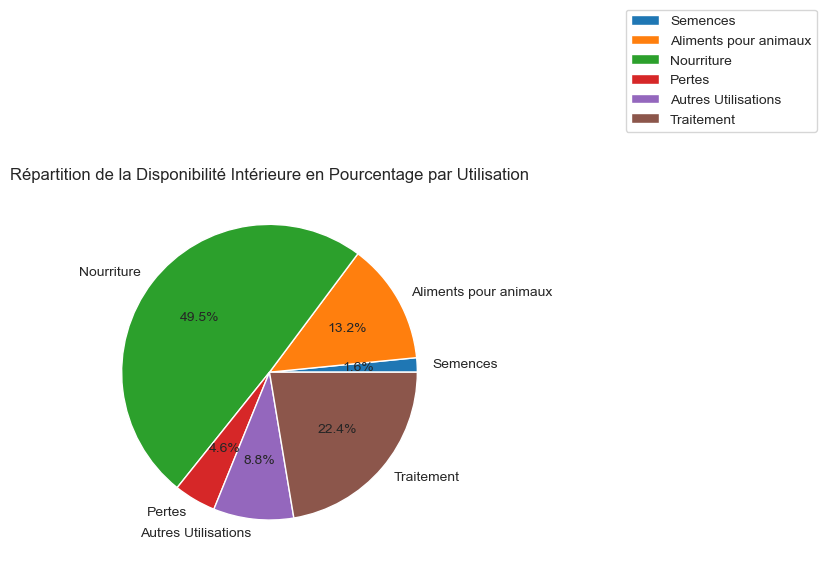

In [63]:
Somme_Sem=dispo_alimentaire['Semences'].sum()
Somme_Autres_Util=dispo_alimentaire['Autres Utilisations'].sum()
Somme_Trait=dispo_alimentaire['Traitement'].sum()
BilanAlim=[Somme_Sem,Somme_AlimAnim,Somme_AlimHum,Somme_Pertes,Somme_Autres_Util,Somme_Trait]
labels=["Semences","Aliments pour animaux","Nourriture", "Pertes","Autres Utilisations","Traitement"]

# Create a pieplot
plt.title('Répartition de la Disponibilité Intérieure en Pourcentage par Utilisation')
plt.pie(BilanAlim, autopct='%1.1f%%', labels=labels )
plt.legend(bbox_to_anchor=(1.5, 0, 0.5, 1.5))
plt.show()

**<span style="color:blue">La disponibilité alimentaire semble plutôt axée vers l'alimentation humaine, avec une part plus réduite pour l'alimentation animale et un niveau de pertes modéré. La priorité accordée à la consommation humaine est un signe positif pour la sécurité alimentaire, mais il est possible d'améliorer la gestion des pertes. Si ces pertes pouvaient être réduites, cela pourrait libérer davantage de ressources alimentaires pour l'alimentation humaine ou animale, augmentant ainsi l'efficacité du système alimentaire global.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II. Demandes formulées par Mélanie pour chacun des pays </a></h3>
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II.1. Pays où la proportion de personnes sous alimentées est la plus forte en 2017</a></h3>
</div>

In [64]:
#Reprise du dataframe "proportion_pers_sous_nutris" de la question 1 et filtrage sur l'année 2017
BcpPersSousNutris2017=proportion_pers_sous_nutris.loc[proportion_pers_sous_nutris['Année']==2017]
#Somme de la population totale de chaque pays et de la population sous nutris
BcpPersSousNutris2017=proportion_pers_sous_nutris.groupby('Zone')[['Population sous nutris','Population']].sum()
BcpPersSousNutris2017

,Population sous nutris,Population
Zone,,
Afghanistan,10500000.0,36296113.0
Afrique du Sud,3100000.0,57009756.0
Albanie,100000.0,2884169.0
Algérie,1300000.0,41389189.0
Allemagne,0.0,82658409.0
...,...,...
États-Unis d'Amérique,0.0,325084756.0
Éthiopie,21100000.0,106399924.0
Îles Cook,0.0,17507.0


In [65]:
#Calcul de la proportion de personnes sous nutris
BcpPersSousNutris2017['PropPersSousNutris2017']=(BcpPersSousNutris2017['Population sous nutris']/BcpPersSousNutris2017['Population'])*100
#Tri en décroissant de la proportion de personnes sous nutris
PropSousNutris2017=BcpPersSousNutris2017.sort_values('PropPersSousNutris2017', ascending=False)
PropSousNutris2017.head(15)

,Population sous nutris,Population,PropPersSousNutris2017
Zone,,,
Dominique,50000.0,71458.0,69.971172
Haïti,5300000.0,10982366.0,48.259182
République populaire démocratique de Corée,12000000.0,25429825.0,47.188685
Saint-Vincent-et-les Grenadines,50000.0,109827.0,45.526146
Kiribati,50000.0,114158.0,43.798945
Madagascar,10500000.0,25570512.0,41.062924
Libéria,1800000.0,4702226.0,38.279742
Lesotho,800000.0,2091534.0,38.249438
Tchad,5700000.0,15016753.0,37.957606


<module 'matplotlib.pyplot' from 'C:\\Users\\bello\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

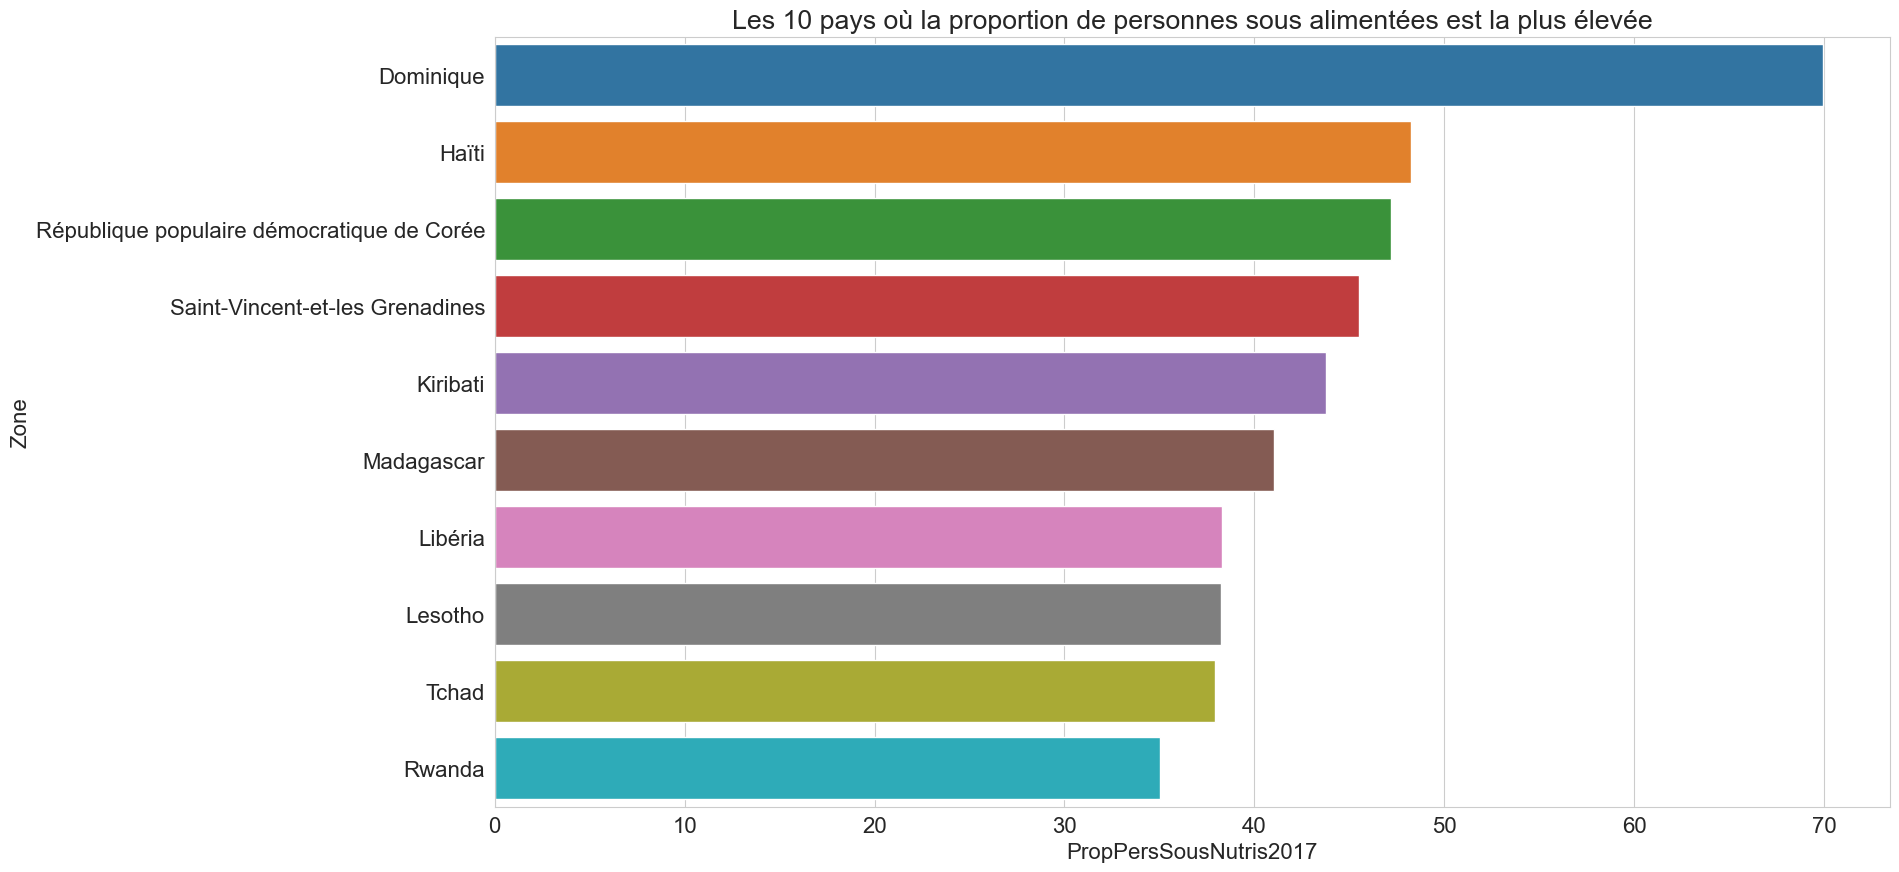

In [95]:
PropSousNutris2017=PropSousNutris2017.reset_index()
plt.figure(figsize=(18,10))
plt.title('Les 10 pays où la proportion de personnes sous alimentées est la plus élevée')
plt.rcParams.update({'font.size': 16})
sns.barplot(data=PropSousNutris2017.head(10), x='PropPersSousNutris2017', y='Zone', ci=None, estimator=sum)
plt

**<span style="color:blue">Dans ces pays, presque la moitié de la population est sous-alimentée. Ces pourcentages élevés reflètent de graves problèmes de sécurité alimentaire, souvent exacerbés par des facteurs comme les conflits (République Centrafricaine), la pauvreté (Madagascar), les catastrophes naturelles (Haiti), et un manque de ressources pour la production agricole.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II.2. Pays qui ont bénéficié le plus d'aide en 2013</a></h3>
</div>

In [91]:
aide_alimentaire

,Pays bénéficiaire,Année,Produit,Qtité Aide en tonne
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [92]:
#Filtrage de l'année 2013 et somme de la quantité d'aide alimentaire qui a été donnée
PlusAideAlim=aide_alimentaire.loc[aide_alimentaire["Année"]==2013, 'Qtité Aide en tonne'].sum()
#Aggrégation par pays bénéficiaires et tri par ordre décroissant pour déterminer les pays pays qui ont bénéficiés le plus d'aide
PlusAideAlim=(aide_alimentaire.groupby('Pays bénéficiaire').sum()).sort_values('Qtité Aide en tonne', ascending=False)
PlusAideAlim.head(15)

,Année,Qtité Aide en tonne
Pays bénéficiaire,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784
Kenya,54376,552836
Bangladesh,50347,348188
Somalie,54377,292678
République démocratique du Congo,50350,288502


<module 'matplotlib.pyplot' from 'C:\\Users\\bello\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

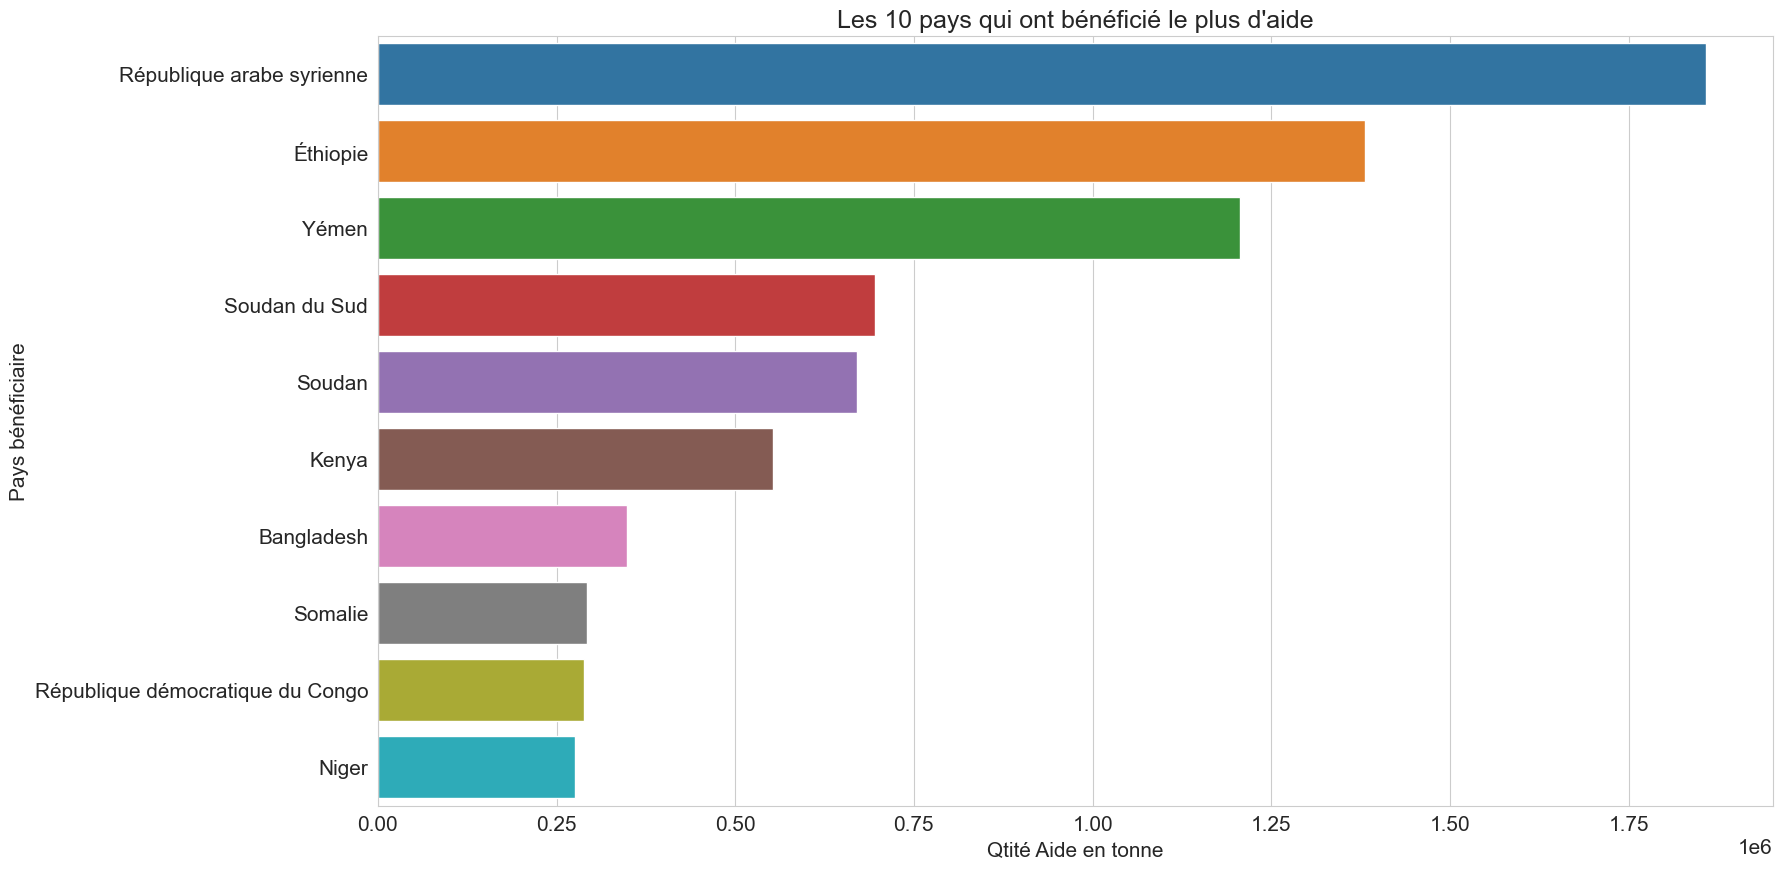

In [93]:
PlusAideAlim=PlusAideAlim.reset_index()
plt.figure(figsize=(18,10))
plt.title("Les 10 pays qui ont bénéficié le plus d'aide")
plt.rcParams.update({'font.size': 15})
sns.barplot(data=PlusAideAlim.head(10), x='Qtité Aide en tonne', y='Pays bénéficiaire', ci=None, estimator=sum)
plt

**<span style="color:blue">Les pays en haut de la liste, tels que la République arabe syrienne, l'Éthiopie, et le Yémen, sont souvent confrontés par des conflits armés, des instabilités politiques, ou des crises économiques qui perturbent la production et la distribution locales de nourriture.**

**<span style="color:blue">La pauvreté, la famine, combinée à des infrastructures affaiblies, rend également ces pays plus dépendants de l'aide internationale pour maintenir la sécurité alimentaire.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II.3. Pays ayant le plus/le moins de disponibilité par habitants</a></h3>
</div>

**Pays ayant le moins de disponibilité alimentaire**

In [96]:
# Sélectionner que les 2 colonnes qui nous intéresse "Zone et "Disponibilité alimentaire (Kcal/personne/jour)"
dispo_alimFaible=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

#Déterminer les pays ayant la disponibilité alimentaire la plus faible
DISPOALIM_Faible=dispo_alimFaible.groupby('Zone').sum().sort_values('Disponibilité alimentaire (Kcal/personne/jour)')
DISPOALIM_Faible.head(15)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


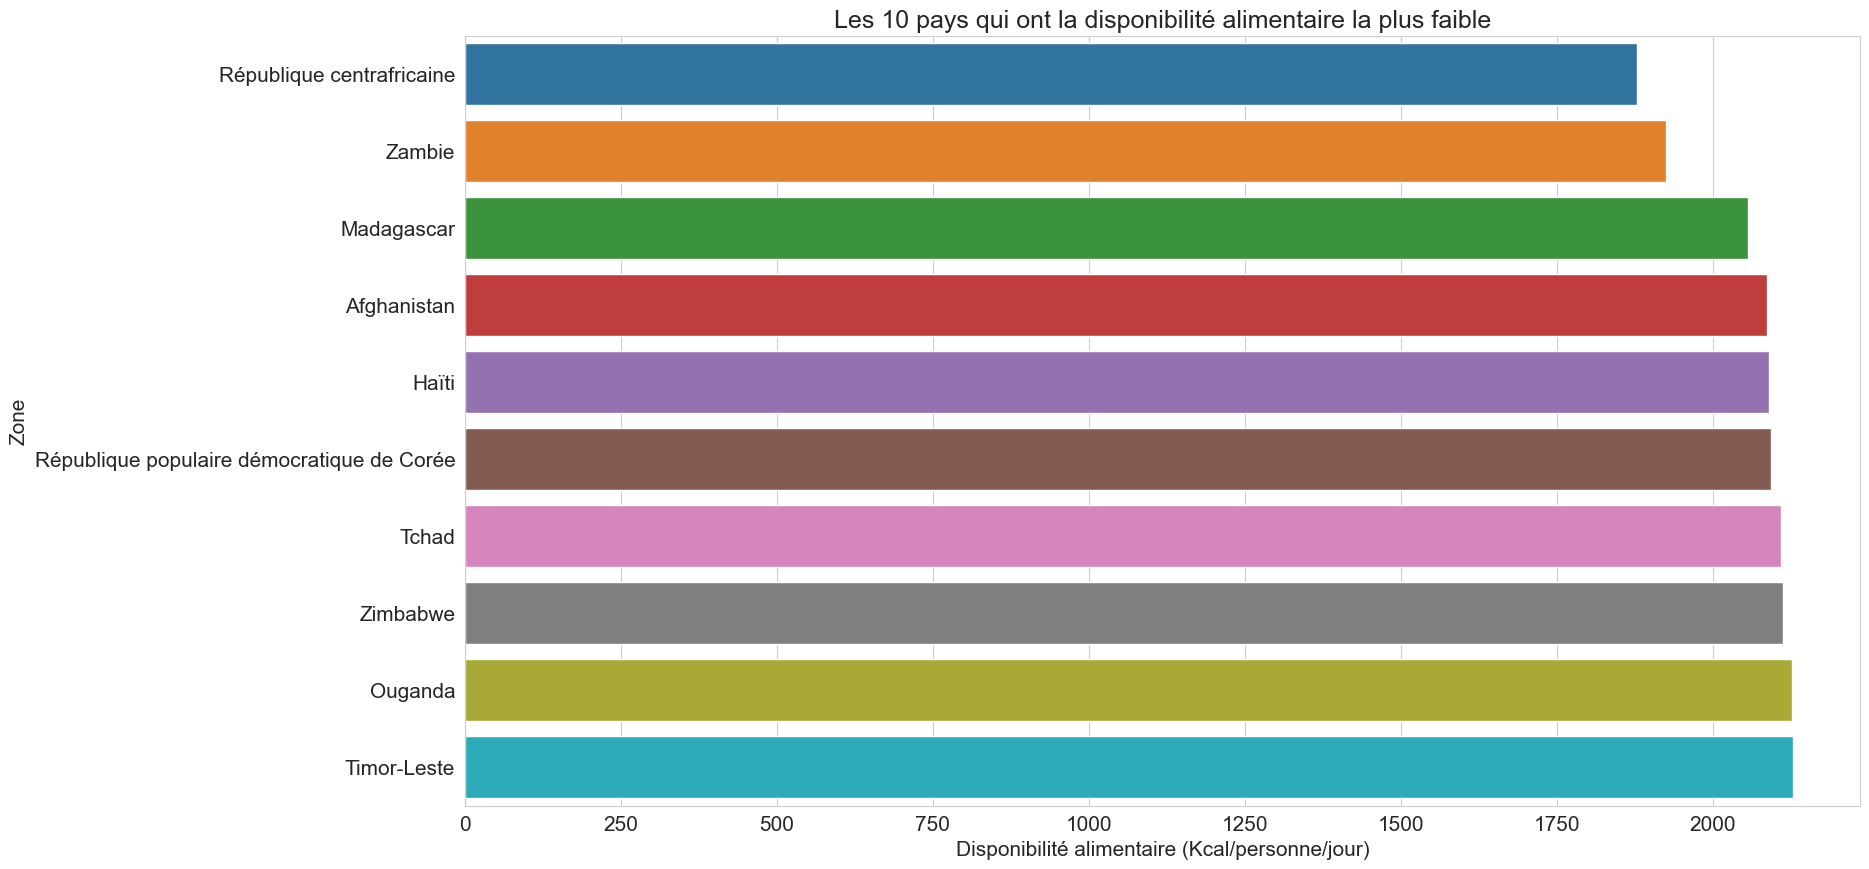

In [99]:
DISPOALIM_Faible=DISPOALIM_Faible.reset_index()
plt.figure(figsize=(18,10))
plt.title("Les 10 pays qui ont la disponibilité alimentaire la plus faible")
plt.rcParams.update({'font.size': 15})
sns.barplot(data=DISPOALIM_Faible.head(10), x='Disponibilité alimentaire (Kcal/personne/jour)', y='Zone', ci=None, estimator=sum)
plt.show()

**<span style="color:blue">Comme pour la liste des pays ayant le plus bénéficié d'aide, ceux qui le moins de disponibité alimentaire sont ceux qui ont le plus de conflits armés ou le plus d'instabilité politique.**

**Pays ayant le plus de disponibilité alimentaire**

In [100]:
# Sélectionner que les 2 colonnes qui nous intéresse "Zone et "Disponibilité alimentaire (Kcal/personne/jour)"
dispo_alimFort=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

#Déterminer les pays ayant la disponibilité alimentaire la plus forte
DISPOALIM_Fort=dispo_alimFort.groupby('Zone').sum().sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)
DISPOALIM_Fort.head(15)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


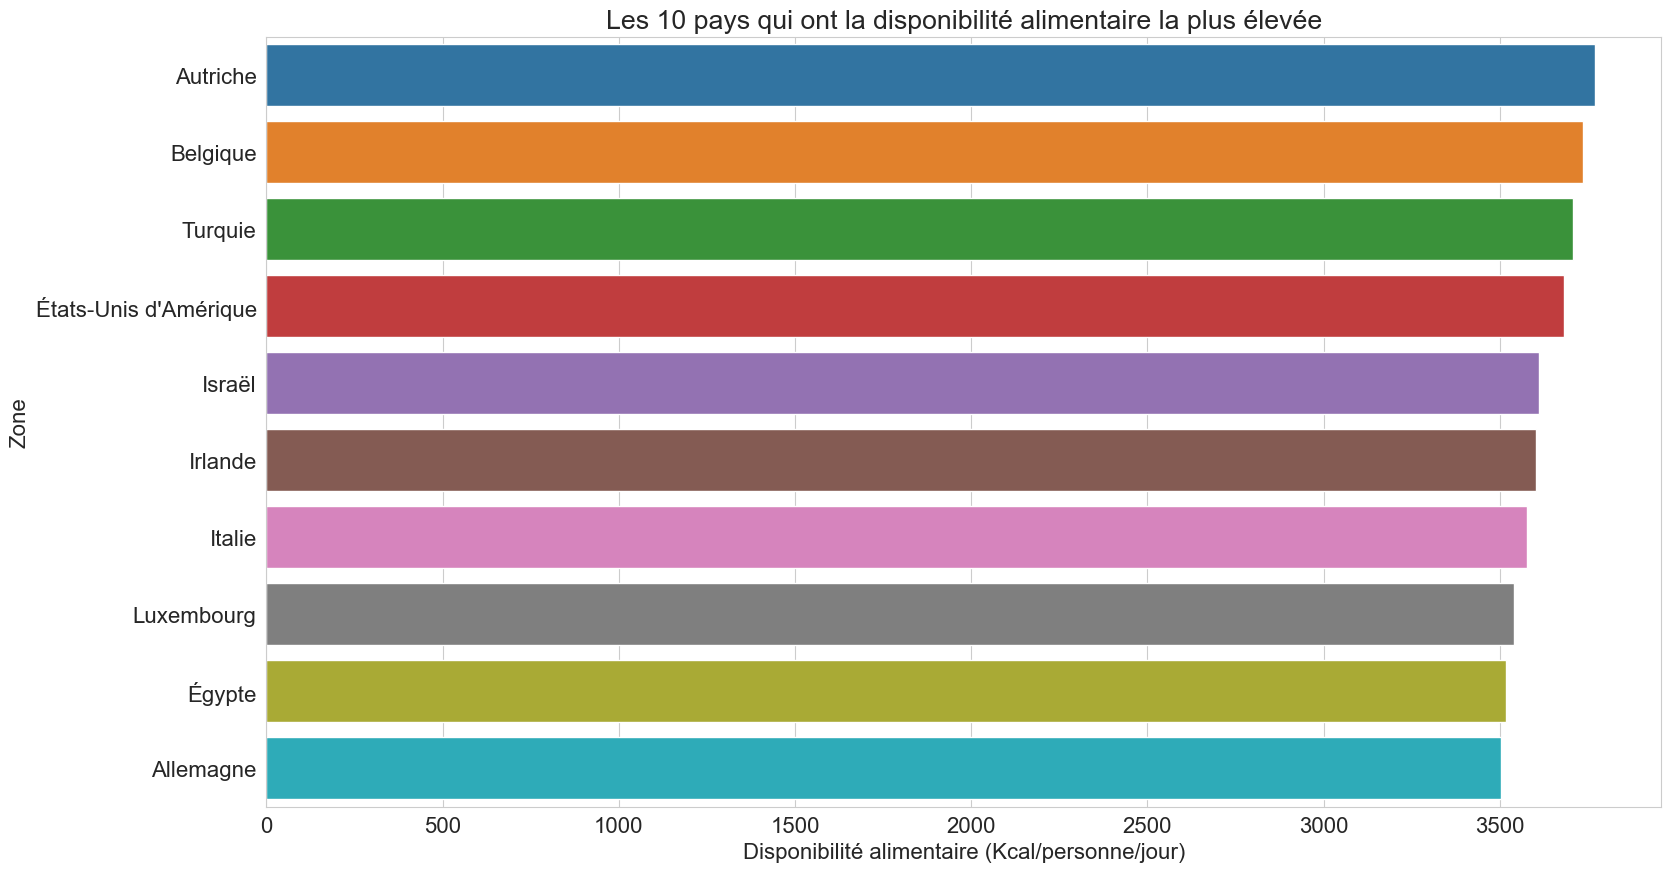

In [103]:
DISPOALIM_Fort=DISPOALIM_Fort.reset_index()
plt.figure(figsize=(18,10))
plt.title("Les 10 pays qui ont la disponibilité alimentaire la plus élevée")
plt.rcParams.update({'font.size': 16})
sns.barplot(data=DISPOALIM_Fort.head(10), x='Disponibilité alimentaire (Kcal/personne/jour)', y='Zone', ci=None, estimator=sum)
plt.show()

**<span style="color:blue">A contrario, les pays qui ont le plus de disponibilité alimentaire sont les plus stables économiquement et politiquement. Ils n'ont aucun conflits sur leur territoire.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> III. Obervations et remarques de Julien </a></h3>
</div>

<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Utilisation étonnante de certaines denrées alimentaire: l'exemple des céréales et du manioc.</a> 
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> III.1. Etude sur l'utilisation des céréales</a></h3>
</div>

In [104]:
#Importation du fichier csv généré dans l'onglet bilan alimentaire sur le site de la FAO
FichierCereales=pd.read_csv('FAOSTAT_data_fr_4-2-2023.csv')

In [105]:
#Extraction de la liste de céréales
ProdCereales=FichierCereales.drop_duplicates(subset=['Produit'])
ProdCereales

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2511,Blé et produits,2022,2022,Kcal,19773529.28,I,Valeur imputée,NaN
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2807,Riz et produits,2022,2022,Kcal,3037565.33,I,Valeur imputée,NaN
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2513,Orge et produits,2022,2022,Kcal,7858.97,I,Valeur imputée,NaN
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2514,Maïs et produits,2022,2022,Kcal,684975.88,I,Valeur imputée,NaN
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2515,Seigle et produits,2022,2022,Kcal,20870.71,I,Valeur imputée,NaN
5,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2516,Avoine,2022,2022,Kcal,870.82,I,Valeur imputée,NaN
6,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2517,Millet et produits,2022,2022,Kcal,9059.64,I,Valeur imputée,NaN
7,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2518,Sorgho et produits,2022,2022,Kcal,929.81,I,Valeur imputée,NaN
8,FBS,Bilans Alimentaires (2010-),4,Afghanistan,661,Disponibilité alimentaire (Kcal),S2520,"Céréales, autres",2022,2022,Kcal,86116.08,I,Valeur imputée,NaN


In [106]:
#Création d'un dataframe de produits céréaliers issu du dataframe dispo_alimentaire d'où on extrait les colonnes les plus utiles pour l'étude
UtiliteCereales=dispo_alimentaire[['Zone', 'Produit','Aliments pour animaux','Nourriture','Autres Utilisations','Exportations - Quantité','Disponibilité intérieure']]
UtiliteCereales = UtiliteCereales.loc[(UtiliteCereales ['Produit']=='Blé et produits')|(UtiliteCereales ['Produit']=='Riz et produits')|(UtiliteCereales ['Produit']=='Orge et produits')|(UtiliteCereales ['Produit']=='Maïs et produits')|(UtiliteCereales ['Produit']=='Seigle et produits')|(UtiliteCereales ['Produit']=='Avoine')|(UtiliteCereales ['Produit']=='Milet et produits')|(UtiliteCereales ['Produit']=='Sorgho et produits')|(UtiliteCereales ['Produit']=='Céréales, Autres')]
UtiliteCereales

,Zone,Produit,Aliments pour animaux,Nourriture,Autres Utilisations,Exportations - Quantité,Disponibilité intérieure
12,Afghanistan,"Céréales, Autres",0.0,0.0,0.0,0.0,0.0
67,Afrique du Sud,Avoine,8.0,40.0,0.0,4.0,49.0
81,Afrique du Sud,"Céréales, Autres",8.0,4.0,0.0,10.0,12.0
162,Albanie,Avoine,25.0,0.0,0.0,0.0,28.0
176,Albanie,"Céréales, Autres",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
15347,États-Unis d'Amérique,Avoine,1430.0,1265.0,0.0,102.0,2797.0
15361,États-Unis d'Amérique,"Céréales, Autres",77.0,200.0,0.0,91.0,271.0
15441,Éthiopie,Avoine,0.0,57.0,0.0,0.0,60.0
15454,Éthiopie,"Céréales, Autres",0.0,2495.0,469.0,0.0,3274.0


**Part d'utilisation des céréales dans l'alimentation humaine**


In [107]:
#Somme des produits céréaliers utilisés dans la l'alimentation humaine
Somme_NourritureCere=UtiliteCereales['Nourriture'].sum()
#Somme des Disponiblites interieures en produits céraliers
Somme_DispoIntCere=UtiliteCereales['Disponibilité intérieure'].sum() 
#Pourcentage de l'utilisation des céréales dans l'alimentation humaine
Pourcentage_NourritureCere=(Somme_NourritureCere/Somme_DispoIntCere)*100
print("La part d'utilisation des céréales dans l'alimentation humaine est de:","%.2f" % Pourcentage_NourritureCere,"%")

La part d'utilisation des céréales dans l'alimentation humaine est de: 18.13 %


**Part d'utilisation des céréales dans l'alimentation animale**


In [108]:
#Somme des produits céréaliers utilisés dans la l'alimentation humaine
Somme_AlimAnimCere=UtiliteCereales['Aliments pour animaux'].sum()
#Somme des Disponiblites interieures en produits céraliers
Somme_DispoIntCere=UtiliteCereales['Disponibilité intérieure'].sum() 
#Pourcentage de l'utilisation des céréales dans l'alimentation humaine
Pourcentage_AlimAnimCere=(Somme_AlimAnimCere/Somme_DispoIntCere)*100
print("La part d'utilisation des céréales dans l'alimentation animale est de:","%.2f" % Pourcentage_AlimAnimCere,"%")

La part d'utilisation des céréales dans l'alimentation animale est de: 69.34 %


In [109]:
BilanAlimCereales=[Pourcentage_NourritureCere, Pourcentage_AlimAnimCere]
labels=["Nourriture", "Aliments pour animaux"]

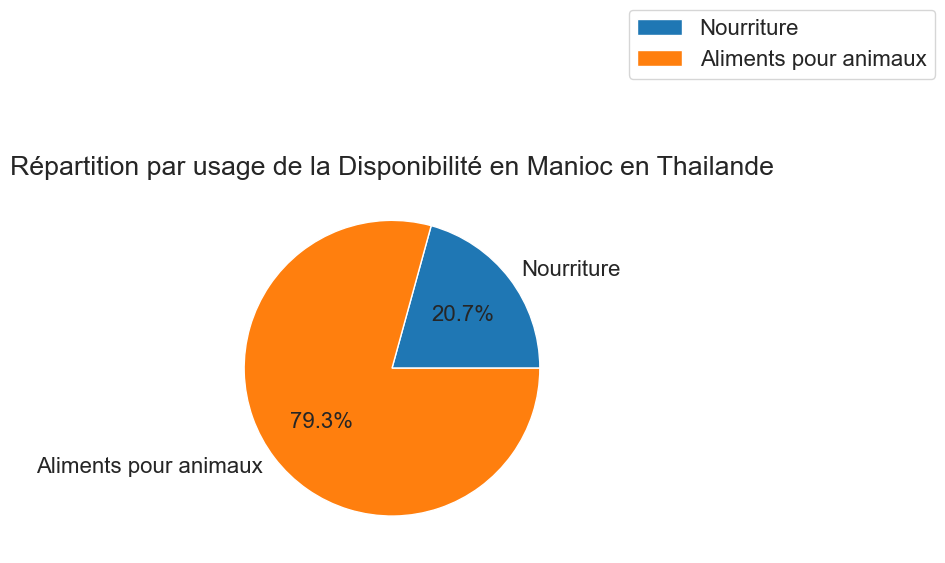

In [110]:
# Create a pieplot
plt.title('Répartition par usage de la Disponibilité en Manioc en Thailande')
plt.pie(BilanAlimCereales, autopct='%1.1f%%', labels=labels )
plt.legend(bbox_to_anchor=(1.5, 0, 0.5, 1.5))
plt.show()

**<span style="color:blue">La majeure partie des céréales, soit 69,34% est utilisée pour nourrir les animaux. Dans les régions où l'industrie de la viande est importante, l'utilisation des céréales pour le bétail est cruciale pour soutenir la production de viande, de produits laitiers et d'autres dérivés animaux. Mais, il y a aussi des implications sur les ressources disponibles pour l'alimentation humaine qui ne représente que 18,13% dans l'utilisation des céréales**

**<span style="color:blue">Une réorientation vers une alimentation plus basée sur les végétaux pourrait potentiellement libérer des ressources céréalières pour la consommation humaine.**

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> III.2. Etude sur l'utilisation du manioc en Thailande </a></h3>
</div>

In [111]:
#Sélection des colonnes utile aux calculs
UtiliteManioc=dispo_alimentaire[['Zone', 'Produit','Aliments pour animaux','Nourriture','Production','Exportations - Quantité','Importations - Quantité','Disponibilité intérieure']]

#WSélection de la ligne contenant "Thailande" et "Manioc"
ThailandeUtiliteManioc=UtiliteManioc.loc[(UtiliteManioc['Zone']=='Thaïlande')&(UtiliteManioc['Produit']=='Manioc')]
ThailandeUtiliteManioc

,Zone,Produit,Aliments pour animaux,Nourriture,Production,Exportations - Quantité,Importations - Quantité,Disponibilité intérieure
13809,Thaïlande,Manioc,1800.0,871.0,30228.0,25214.0,1250.0,6264.0


### **Part d'utilisation du manioc dans l'alimentation humaine**

In [112]:
PourcentageManiocAlimHum=(ThailandeUtiliteManioc['Nourriture']/ThailandeUtiliteManioc['Production'])*100
print("La part d'utilisation du manioc dans l'alimentation humaine est de:","%.2f" % PourcentageManiocAlimHum,"%")

La part d'utilisation du manioc dans l'alimentation humaine est de: 2.88 %


### **Part d'utilisation du manioc dans l'alimentation animale**

In [113]:
PourcentageManiocAlimAnim=(ThailandeUtiliteManioc['Aliments pour animaux']/ThailandeUtiliteManioc['Production'])*100
print("La part d'utilisation des céréales dans l'alimentation animale est de:","%.2f" % PourcentageManiocAlimAnim,"%")

La part d'utilisation des céréales dans l'alimentation animale est de: 5.95 %


### **Part d'exportation du manioc**

In [114]:
PourcentageManiocExport=(ThailandeUtiliteManioc['Exportations - Quantité']/ThailandeUtiliteManioc['Production'])*100
print("La part d'exportation du manioc est de:","%.2f" % PourcentageManiocExport,"%")

La part d'exportation du manioc est de: 83.41 %


### **proportion de personnes malnutris en Thaïlande**

In [115]:
Thailande=proportion_pers_sous_nutris.loc[proportion_pers_sous_nutris['Zone']=='Thaïlande']
prop_PersSousNutrisThailande=(Thailande['Population sous nutris']/Thailande['Population'])*100
print("La proportion de personnes malnutris en Thaïlande est de:","%.2f" % prop_PersSousNutrisThailande,"%")

La proportion de personnes malnutris en Thaïlande est de: 8.96 %


In [116]:
PourcentageManiocImport=(ThailandeUtiliteManioc['Importations - Quantité']/ThailandeUtiliteManioc['Production'])*100
print("La part d'importation du manioc en Thaïlande est de:","%.2f" % PourcentageManiocImport,"%")

La part d'importation du manioc en Thaïlande est de: 4.14 %


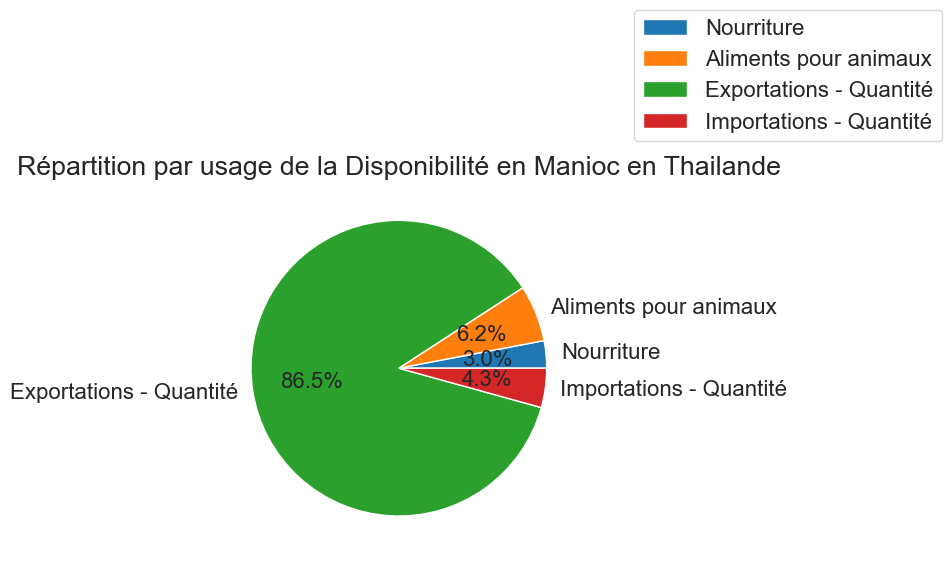

In [117]:
#Calcul du pourcentage de manioc inmporté
PourcentageManiocImport=(ThailandeUtiliteManioc['Importations - Quantité']/ThailandeUtiliteManioc['Production'])*100

# Création d'un sous dataframe pour connaître la répartition par usage de la Disponibilité en Manioc en Thailande
BilanAlimManioc=[PourcentageManiocAlimHum, PourcentageManiocAlimAnim, PourcentageManiocExport,PourcentageManiocImport]
BilanAlimManioc = np.array(BilanAlimManioc).flatten()
labels=["Nourriture","Aliments pour animaux", "Exportations - Quantité", "Importations - Quantité"]
 
# Create a pieplot pour connaitre Répartition par usage de la Disponibilité en Manioc en Thailande
plt.title('Répartition par usage de la Disponibilité en Manioc en Thailande')
plt.pie(BilanAlimManioc, autopct='%1.1f%%', labels=labels )
plt.legend(bbox_to_anchor=(1.5, 0, 0.5, 1.5))
plt.show()

**<span style="color:blue">Le manioc n'est pas un aliment majeur dans l'alimentation traditionnel des thailandais, c'est un produit principalement destiné à 83,41% à l'exportation et est importé à seulement 4.14%. Cette importation sert éventuellement à compléter celle utilisée dans l'alimentation animale et humaine et/ou lorsque la production est insuffisante.** 

**<span style="color:blue">L'exportation du manioc apporte des revenus à la Thailande grâce aux échanges commerciaux. Avec une population sous nutris qui représente 83.41%, le pays pourrait étudier le potentiel nutritionnel du manioc pour inciter sa population à l'adopter dans leur alimentation et ainsi améliorer les défis liés à la malnutrition. Elle devra alors augmenter sa production et augmenter les rendements pour faire face à la demande**

<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Informations supplémentaire qui mettent en relief les pays les plus en difficultés.</a> 
</div>

In [118]:
#Creation du dataframe A qui permettra l'étude des pays les plus en difficultés
A=dispo_alimentaire[['Zone','Production','Importations - Quantité','Exportations - Quantité','Pertes','Variation de stock']]
A=A.groupby('Zone')['Production','Importations - Quantité', 'Exportations - Quantité','Pertes','Variation de stock'].sum()
A

C:\Users\bello\AppData\Local\Temp\ipykernel_35396\776205889.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  A=A.groupby('Zone')['Production','Importations - Quantité', 'Exportations - Quantité','Pertes','Variation de stock'].sum()


,Production,Importations - Quantité,Exportations - Quantité,Pertes,Variation de stock
Zone,,,,,
Afghanistan,11171.0,2988.0,278.0,1135.0,-368.0
Afrique du Sud,63263.0,7517.0,11674.0,2193.0,2153.0
Albanie,3964.0,933.0,94.0,276.0,-45.0
Algérie,26359.0,17403.0,655.0,3753.0,-479.0
Allemagne,154547.0,65353.0,57431.0,3781.0,-192.0
...,...,...,...,...,...
Émirats arabes unis,1192.0,15327.0,4343.0,705.0,-327.0
Équateur,24337.0,1725.0,8002.0,707.0,557.0
États-Unis d'Amérique,894668.0,81887.0,163524.0,7162.0,-35032.0


In [119]:
# Création et calcul des taux de dépendance des importations (TDI) pour chaque pays
A['TDI'] =(A['Importations - Quantité']/(A['Production']+A['Importations - Quantité']-A['Exportations - Quantité']+A['Variation de stock']))*100
A.head(10)

,Production,Importations - Quantité,Exportations - Quantité,Pertes,Variation de stock,TDI
Zone,,,,,,
Afghanistan,11171.0,2988.0,278.0,1135.0,-368.0,22.112040
Afrique du Sud,63263.0,7517.0,11674.0,2193.0,2153.0,12.270850
Albanie,3964.0,933.0,94.0,276.0,-45.0,19.609079
Algérie,26359.0,17403.0,655.0,3753.0,-479.0,40.825279
Allemagne,154547.0,65353.0,57431.0,3781.0,-192.0,40.272497
Angola,28857.0,4416.0,23.0,4799.0,-1228.0,13.790519
Antigua-et-Barbuda,20.0,63.0,0.0,0.0,-7.0,82.894737
Arabie saoudite,8878.0,27726.0,4707.0,1040.0,-628.0,88.669289
Argentine,176124.0,1212.0,52333.0,3522.0,-10632.0,1.059709


In [120]:
# Création et calcul des taux de suffisance alimentaire (TAS) pour chaque pays
A['TAS'] =(A['Production']/(A['Production']+A['Importations - Quantité']-A['Exportations - Quantité']+A['Variation de stock']))*100
A

,Production,Importations - Quantité,Exportations - Quantité,Pertes,Variation de stock,TDI,TAS
Zone,,,,,,,
Afghanistan,11171.0,2988.0,278.0,1135.0,-368.0,22.112040,82.668541
Afrique du Sud,63263.0,7517.0,11674.0,2193.0,2153.0,12.270850,103.271356
Albanie,3964.0,933.0,94.0,276.0,-45.0,19.609079,83.312316
Algérie,26359.0,17403.0,655.0,3753.0,-479.0,40.825279,61.834944
Allemagne,154547.0,65353.0,57431.0,3781.0,-192.0,40.272497,95.236540
...,...,...,...,...,...,...,...
Émirats arabes unis,1192.0,15327.0,4343.0,705.0,-327.0,129.352688,10.059921
Équateur,24337.0,1725.0,8002.0,707.0,557.0,9.265725,130.724607
États-Unis d'Amérique,894668.0,81887.0,163524.0,7162.0,-35032.0,10.525335,114.996035


In [121]:
#Dataframe "proportion_pers_sous_nutris2017" qui permettait de déterminer la proportion de personnes sous-nutris dans la question 1
proportion_pers_sous_nutris2017=proportion_pers_sous_nutris.loc[proportion_pers_sous_nutris['Année']==2017]

In [122]:
#Création de du df "B" qui fusionne les df "proportion_pers_sous_nutris2017" et "A" pour déterminer le TDI, le TAS et les pertes en fonction de la proportion de personnes sous-nutris
B=pd.merge(A,proportion_pers_sous_nutris2017, on='Zone', how='left')
B['PropPSN']=(B['Population sous nutris']/B['Population'])*100
B

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,Variation de stock,TDI,TAS,Population sous nutris,Année,Population,PropPSN
0,Afghanistan,11171.0,2988.0,278.0,1135.0,-368.0,22.112040,82.668541,10500000.0,2017.0,36296113.0,28.928718
1,Afrique du Sud,63263.0,7517.0,11674.0,2193.0,2153.0,12.270850,103.271356,3100000.0,2017.0,57009756.0,5.437666
2,Albanie,3964.0,933.0,94.0,276.0,-45.0,19.609079,83.312316,100000.0,2017.0,2884169.0,3.467203
3,Algérie,26359.0,17403.0,655.0,3753.0,-479.0,40.825279,61.834944,1300000.0,2017.0,41389189.0,3.140917
4,Allemagne,154547.0,65353.0,57431.0,3781.0,-192.0,40.272497,95.236540,0.0,2017.0,82658409.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1192.0,15327.0,4343.0,705.0,-327.0,129.352688,10.059921,300000.0,2017.0,9487203.0,3.162154
170,Équateur,24337.0,1725.0,8002.0,707.0,557.0,9.265725,130.724607,1500000.0,2017.0,16785361.0,8.936358
171,États-Unis d'Amérique,894668.0,81887.0,163524.0,7162.0,-35032.0,10.525335,114.996035,0.0,2017.0,325084756.0,0.000000
172,Éthiopie,46102.0,1711.0,941.0,2256.0,-2857.0,3.887311,104.741565,21100000.0,2017.0,106399924.0,19.830841


In [123]:
#Suppression des colonnes devenues inutiles
B=B.drop(columns=['Population sous nutris','Année','Variation de stock'])
B

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,TDI,TAS,Population,PropPSN
0,Afghanistan,11171.0,2988.0,278.0,1135.0,22.112040,82.668541,36296113.0,28.928718
1,Afrique du Sud,63263.0,7517.0,11674.0,2193.0,12.270850,103.271356,57009756.0,5.437666
2,Albanie,3964.0,933.0,94.0,276.0,19.609079,83.312316,2884169.0,3.467203
3,Algérie,26359.0,17403.0,655.0,3753.0,40.825279,61.834944,41389189.0,3.140917
4,Allemagne,154547.0,65353.0,57431.0,3781.0,40.272497,95.236540,82658409.0,0.000000
...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1192.0,15327.0,4343.0,705.0,129.352688,10.059921,9487203.0,3.162154
170,Équateur,24337.0,1725.0,8002.0,707.0,9.265725,130.724607,16785361.0,8.936358
171,États-Unis d'Amérique,894668.0,81887.0,163524.0,7162.0,10.525335,114.996035,325084756.0,0.000000
172,Éthiopie,46102.0,1711.0,941.0,2256.0,3.887311,104.741565,106399924.0,19.830841


In [124]:
#Vérifier que lors de la fusion il n'y a pas de valeurs manquantes
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     174 non-null    object 
 1   Production               174 non-null    float64
 2   Importations - Quantité  174 non-null    float64
 3   Exportations - Quantité  174 non-null    float64
 4   Pertes                   174 non-null    float64
 5   TDI                      174 non-null    float64
 6   TAS                      174 non-null    float64
 7   Population               172 non-null    float64
 8   PropPSN                  172 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.6+ KB


In [125]:
# Vérifier où se trouve les 2 valeurs manquantes dans la colonne "PropPSN"
B.loc[B['PropPSN'].isnull(),:]

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,TDI,TAS,Population,PropPSN
126,Royaume-Uni,67602.0,43196.0,13177.0,1144.0,45.139244,70.643189,NaN,NaN
152,Tchéquie (la),20714.0,5512.0,6982.0,271.0,28.451969,106.922005,NaN,NaN


In [126]:
#Remplacement des valeurs NaN par 0
B['PropPSN']=B['PropPSN'].fillna(0)
B

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,TDI,TAS,Population,PropPSN
0,Afghanistan,11171.0,2988.0,278.0,1135.0,22.112040,82.668541,36296113.0,28.928718
1,Afrique du Sud,63263.0,7517.0,11674.0,2193.0,12.270850,103.271356,57009756.0,5.437666
2,Albanie,3964.0,933.0,94.0,276.0,19.609079,83.312316,2884169.0,3.467203
3,Algérie,26359.0,17403.0,655.0,3753.0,40.825279,61.834944,41389189.0,3.140917
4,Allemagne,154547.0,65353.0,57431.0,3781.0,40.272497,95.236540,82658409.0,0.000000
...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1192.0,15327.0,4343.0,705.0,129.352688,10.059921,9487203.0,3.162154
170,Équateur,24337.0,1725.0,8002.0,707.0,9.265725,130.724607,16785361.0,8.936358
171,États-Unis d'Amérique,894668.0,81887.0,163524.0,7162.0,10.525335,114.996035,325084756.0,0.000000
172,Éthiopie,46102.0,1711.0,941.0,2256.0,3.887311,104.741565,106399924.0,19.830841


In [127]:
B['PropPSN'] = pd.to_numeric(B['PropPSN'], errors='coerce') # Convertir la colonne en numérique
B = B.dropna(subset=['PropPSN']) # Supprimer les valeurs manquantes dans la colonne

In [128]:
#Pays ayant la plus grande proportion de personnes sous-nutris en fonction des pertes, des TDI, TAS 
sousnutris=B.sort_values(['PropPSN'], ascending=False)
sousnutris.head(10)

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,TDI,TAS,Population,PropPSN
46,Dominique,119.0,29.0,5.0,20.0,20.279720,83.216783,71458.0,69.971172
65,Haïti,5072.0,1204.0,15.0,679.0,19.469599,82.018111,10982366.0,48.259182
133,République populaire démocratique de Corée,13883.0,993.0,83.0,1066.0,6.674733,93.318545,25429825.0,47.188685
136,Saint-Vincent-et-les Grenadines,131.0,74.0,28.0,5.0,40.659341,71.978022,109827.0,45.526146
82,Kiribati,269.0,24.0,45.0,0.0,10.041841,112.552301,114158.0,43.798945
91,Madagascar,14160.0,924.0,236.0,966.0,6.069763,93.017145,25570512.0,41.062924
87,Libéria,1533.0,470.0,34.0,111.0,23.453094,76.497006,4702226.0,38.279742
84,Lesotho,418.0,467.0,32.0,51.0,48.293692,43.226474,2091534.0,38.249438
151,Tchad,5153.0,290.0,0.0,459.0,5.469634,97.189740,15016753.0,37.957606
127,Rwanda,12952.0,558.0,331.0,435.0,5.551686,128.862800,11980961.0,35.055619


### **Heatmap pour visualiser la proportion de personnes sous-nutris en fonction de la disponibilité alimentaire et du TDI et du TAS**

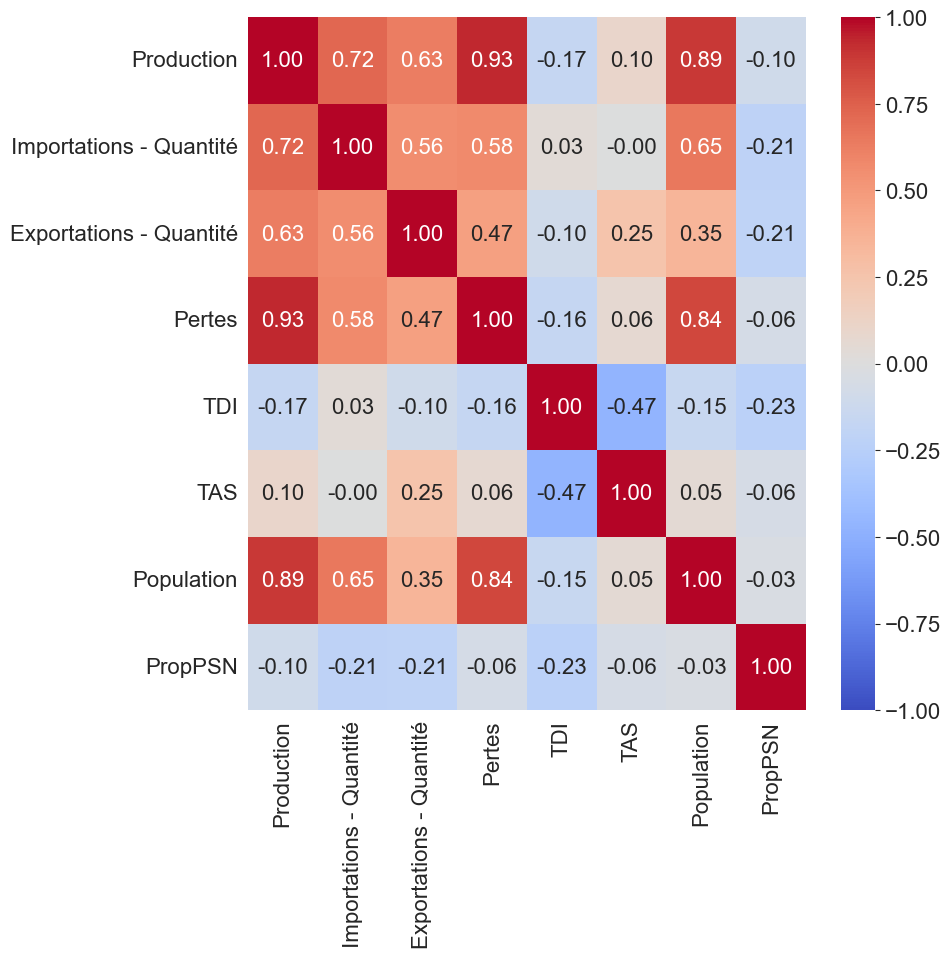

In [129]:
# Heatmap pour visualiser les corrélations pour visualiser proportion de personnes sous-nutris en fonction des pertes, des TDI, TAS
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(sousnutris.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

**<span style="color:blue">Cette heatmap montre que les pays ayant une forte dépendance à l’importation et un faible capacité d’autosuffisance (TDI élevé et TAS faible) ont des taux plus élevés de sous-nutrition. La stratégie pour réduire la sous-nutrition est d’augmenter la production intérieure ou d’améliorer la capacité de stockage et de distribution pour réduire les pertes.**

**<span style="color:blue">Les pertes importantes et la corrélation entre les exportations et la production montrent aussi que l’on peut améliorer les systèmes de gestion alimentaire pour réduire le gaspillage, ce qui pourrait avoir un impact positif sur la sécurité alimentaire.**

### **Les 10 Pays ayant le plus fort Taux de Dépendance à l'Importation (TDI)**

In [130]:
TDIFort=B.sort_values(['TDI'], ascending=False)
TDIFort.head(10)

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,TDI,TAS,Population,PropPSN
45,Djibouti,76.0,1628.0,113.0,10.0,308.918406,14.421252,944099.0,0.000000
33,Chine - RAS de Hong-Kong,470.0,9510.0,3604.0,216.0,148.130841,7.320872,7306322.0,0.000000
89,Luxembourg,593.0,1076.0,821.0,11.0,133.333333,73.482032,591910.0,0.000000
18,Bermudes,6.0,77.0,24.0,0.0,130.508475,10.169492,63049.0,0.000000
169,Émirats arabes unis,1192.0,15327.0,4343.0,705.0,129.352688,10.059921,9487203.0,3.162154
119,Pays-Bas,41636.0,52910.0,52179.0,597.0,124.617269,98.063969,17021347.0,0.000000
16,Belgique,24496.0,35276.0,30345.0,564.0,120.137588,83.424718,11419748.0,0.000000
113,Oman,1169.0,3464.0,1217.0,113.0,98.381142,33.200795,4665928.0,8.572786
83,Koweït,636.0,3690.0,467.0,159.0,96.344648,16.605744,4056099.0,0.000000
34,Chine - RAS de Macao,16.0,367.0,2.0,1.0,95.822454,4.177546,622585.0,8.031032


### **Les 10 Pays ayant le plus faible Taux d'Autosuffisant (TAS)**

In [131]:
TASFaible=B.sort_values(['TAS'])
TASFaible.head(10)

,Zone,Production,Importations - Quantité,Exportations - Quantité,Pertes,TDI,TAS,Population,PropPSN
34,Chine - RAS de Macao,16.0,367.0,2.0,1.0,95.822454,4.177546,622585.0,8.031032
33,Chine - RAS de Hong-Kong,470.0,9510.0,3604.0,216.0,148.130841,7.320872,7306322.0,0.000000
169,Émirats arabes unis,1192.0,15327.0,4343.0,705.0,129.352688,10.059921,9487203.0,3.162154
18,Bermudes,6.0,77.0,24.0,0.0,130.508475,10.169492,63049.0,0.000000
45,Djibouti,76.0,1628.0,113.0,10.0,308.918406,14.421252,944099.0,0.000000
83,Koweït,636.0,3690.0,467.0,159.0,96.344648,16.605744,4056099.0,0.000000
22,Brunéi Darussalam,60.0,244.0,11.0,4.0,83.848797,20.618557,424473.0,0.000000
156,Trinité-et-Tobago,275.0,898.0,95.0,19.0,84.082397,25.749064,1384059.0,3.612563
6,Antigua-et-Barbuda,20.0,63.0,0.0,0.0,82.894737,26.315789,95426.0,0.000000
7,Arabie saoudite,8878.0,27726.0,4707.0,1040.0,88.669289,28.392337,33101179.0,4.833665


**<span style="color:blue">Les pays avec les plus hauts taux de dépendance à l'importation et les plus faibles taux d'autosuffisance alimentaire sont principalement des nations à forte densité urbaine, des îles, ou des économies très axées sur les services. Bien qu’ils soient économiquement capables de maintenir l’approvisionnement alimentaire par les importations, leur sécurité alimentaire reste fragile face aux chocs externes.** 

**<span style="color:blue">Pour améliorer leur résilience, ces pays pourraient envisager des stratégies d'optimisation des stocks, des partenariats commerciaux stables, voire des investissements dans l'agriculture urbaine ou des solutions de production alimentaire innovantes.**

**<span style="color:red">Conclusion : Pour assurer une sécurité alimentaire mondiale plus équitable et durable, les recommandations suivantes sont proposées :**

- **<span style="color:red"> Améliorer la répartition et la réduction du gaspillage alimentaire pour permettre une utilisation plus efficace des ressources mondiales.**
- **<span style="color:red">Renforcer la résilience des pays vulnérables, notamment en investissant dans des infrastructures agricoles, des capacités de stockage et des stratégies de réduction des pertes alimentaires.**
- **<span style="color:red">Encourager des partenariats commerciaux stables et des investissements dans l'agriculture urbaine pour les pays fortement dépendants des importations, en particulier ceux à forte densité urbaine.**
- **<span style="color:red">Promouvoir une réorientation vers des régimes alimentaires plus végétaux pour libérer des ressources céréalières, augmentant ainsi la disponibilité pour l'alimentation humaine.**

**<span style="color:red">Ces actions permettraient non seulement de réduire les inégalités en matière d'accès à la nourriture, mais aussi d’augmenter l'efficacité globale du système alimentaire, contribuant ainsi à une sécurité alimentaire plus durable et résiliente face aux défis mondiaux.**